In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_train = pd.read_csv("/content/train.csv") ##Reading the training data
df_test = pd.read_csv("/content/test.csv") ##Reading the testing data


In [6]:
df_train.head() ##returns the first 5 rows of the training dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
df_test.head()##returns the first 5 rows of the testing dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [8]:
df_train.describe() ##Returns the statistical data related to the table.

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
df_train.info() ##Information about the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
print('Married: ' + str(df_train['Married'].unique()))
print('Dependents: '+ str(df_train['Dependents'].unique()))
print('Education: '+ str(df_train['Education'].unique()))
print('Self_Employed: '+ str(df_train['Self_Employed'].unique()))
print('Property_Area: '+ str(df_train['Property_Area'].unique()))

##To print out the unique values from each column

Married: ['No' 'Yes' nan]
Dependents: ['0' '1' '2' '3+' nan]
Education: ['Graduate' 'Not Graduate']
Self_Employed: ['No' 'Yes' nan]
Property_Area: ['Urban' 'Rural' 'Semiurban']


In [11]:
Approved = df_train[df_train['Loan_Status']=='Y']['Loan_Status'].count() ##Count of all the approved loans
Rejected = df_train[df_train['Loan_Status']=='N']['Loan_Status'].count() ##Count of all the rejected loans

In [12]:
stats = pd.DataFrame([Approved,Rejected])

In [13]:
stats

,0
0,422
1,192


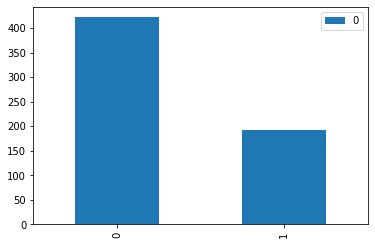

In [14]:
stats.plot(kind='bar')

In [15]:
df_train.isnull().sum() ##Prints out all the null values in the training table.

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


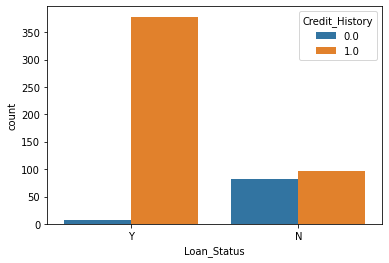

In [16]:
sns.countplot(df_train['Loan_Status'],hue=df_train["Credit_History"])

In [17]:
print(pd.crosstab(df_train['Credit_History'],df_train['Loan_Status']))

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


In [18]:
##Imputing missing values with 1
df_train["Credit_History"]=df_train['Credit_History'].fillna('1.0')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


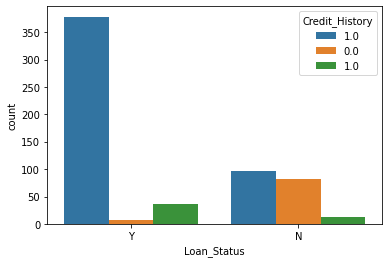

In [19]:
sns.countplot(df_train['Loan_Status'],hue = df_train['Credit_History'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


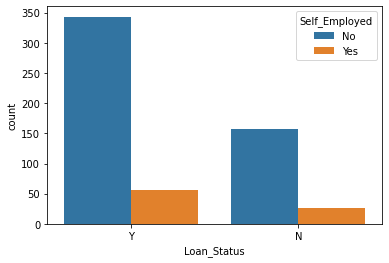

In [20]:
sns.countplot(df_train['Loan_Status'],hue=df_train['Self_Employed'])##Dealing with self employed column

In [21]:
df_train['Self_Employed']= df_train['Self_Employed'].fillna('No')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


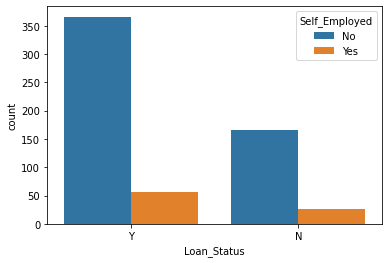

In [22]:
sns.countplot(df_train['Loan_Status'],hue=df_train['Self_Employed'])

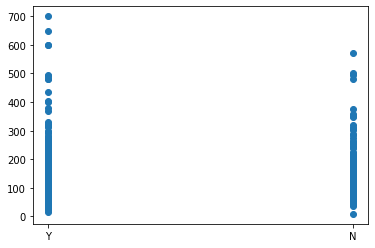

In [23]:
##Use scatterplot for loan amount as it is a numerical variable
plt.scatter(df_train['Loan_Status'],df_train['LoanAmount'])

In [24]:
##Filling the missing values with the mean 
df_train['LoanAmount']=df_train['LoanAmount'].fillna(df_train.LoanAmount.mean())

In [25]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [26]:
df_train.dropna(inplace = True) ##Dropping the remaining columns with empty values as they are less importance

In [27]:
df_train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [28]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,573.000000,573.000000,573.000000,573.000000
mean,5328.514834,1641.359372,146.016131,341.675393
std,5909.329219,3001.139055,82.569554,65.186012
min,150.000000,0.000000,9.000000,12.000000
25%,2876.000000,0.000000,100.000000,360.000000
50%,3812.000000,1210.000000,129.000000,360.000000
75%,5815.000000,2302.000000,165.000000,360.000000
max,81000.000000,41667.000000,650.000000,480.000000


{'boxes': [<matplotlib.lines.Line2D at 0x7fc0fbd0e160>],
 'caps': [<matplotlib.lines.Line2D at 0x7fc0fbd0eb70>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc0fbd19630>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fc0fbd192b0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fc0fbd0e470>,
  <matplotlib.lines.Line2D at 0x7fc0fbd0e7f0>]}

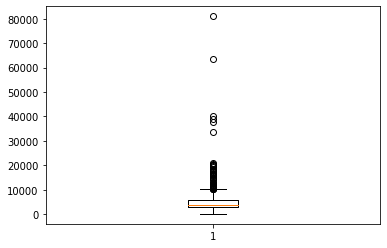

In [29]:
##We need to deal with outliers now.
plt.boxplot(df_train['ApplicantIncome'])

In [30]:
df_train=df_train[df_train['ApplicantIncome']<50000]

{'boxes': [<matplotlib.lines.Line2D at 0x7fc0f3a8ab38>],
 'caps': [<matplotlib.lines.Line2D at 0x7fc0f3a98588>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc0f3aa3048>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fc0f3a98c88>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fc0f3a8ae48>,
  <matplotlib.lines.Line2D at 0x7fc0f3a98208>]}

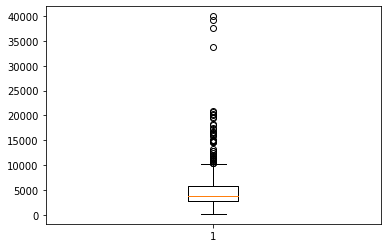

In [31]:
plt.boxplot(df_train['ApplicantIncome'])

In [32]:
df_train[df_train['ApplicantIncome']>25000]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0,Semiurban,Y
183,LP001637,Male,Yes,1,Graduate,No,33846,0.0,260.0,360.0,1,Semiurban,N
185,LP001640,Male,Yes,0,Graduate,Yes,39147,4750.0,120.0,360.0,1,Semiurban,Y
443,LP002422,Male,No,1,Graduate,No,37719,0.0,152.0,360.0,1,Semiurban,Y


{'boxes': [<matplotlib.lines.Line2D at 0x7fc0f39f58d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fc0f3a03320>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc0f3a03da0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fc0f3a03a20>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fc0f39f5be0>,
  <matplotlib.lines.Line2D at 0x7fc0f39f5f60>]}

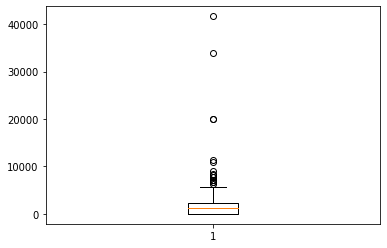

In [33]:
plt.boxplot(df_train['CoapplicantIncome'])

In [34]:
df_train[df_train['CoapplicantIncome']>10000]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1,Semiurban,N
177,LP001610,Male,Yes,3+,Graduate,No,5516,11300.0,495.0,360.0,0,Semiurban,N
402,LP002297,Male,No,0,Graduate,No,2500,20000.0,103.0,360.0,1,Semiurban,Y
417,LP002342,Male,Yes,2,Graduate,Yes,1600,20000.0,239.0,360.0,1,Urban,N
581,LP002893,Male,No,0,Graduate,No,1836,33837.0,90.0,360.0,1,Urban,N
600,LP002949,Female,No,3+,Graduate,No,416,41667.0,350.0,180.0,1.0,Urban,N


In [35]:
df_train = df_train[df_train['CoapplicantIncome']<10000]

{'boxes': [<matplotlib.lines.Line2D at 0x7fc0f397c5c0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fc0f397cfd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc0f3989a90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fc0f3989710>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fc0f397c8d0>,
  <matplotlib.lines.Line2D at 0x7fc0f397cc50>]}

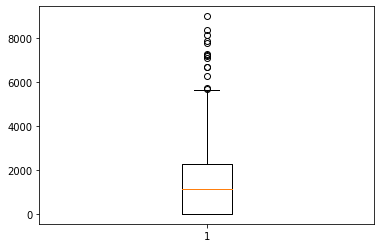

In [36]:
plt.boxplot(df_train['CoapplicantIncome'])

In [37]:
df_train.drop('Loan_ID',axis=1,inplace = True)

In [38]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,565.000000,565.000000,565.000000,565.000000
mean,5104.766372,1420.755611,143.701315,342.053097
std,4363.815814,1697.964697,78.937593,64.908261
min,150.000000,0.000000,9.000000,12.000000
25%,2889.000000,0.000000,100.000000,360.000000
50%,3812.000000,1131.000000,128.000000,360.000000
75%,5800.000000,2253.000000,162.000000,360.000000
max,39999.000000,8980.000000,650.000000,480.000000


In [39]:
df_train.skew()

ApplicantIncome      3.989262
CoapplicantIncome    1.400708
LoanAmount           2.625698
Loan_Amount_Term    -2.453872
Credit_History      -2.216794
dtype: float64

In [40]:
##Now we make all other columns also numeric
df_train['Married'] = np.where((df_train['Married'] == 'Yes'), 1, 0)
df_train['Gender'] = np.where((df_train['Gender'] == 'Female'), 1, 0)
df_train['Education'] = np.where((df_train['Education'] == 'Graduate'), 1, 0)
df_train['Self_Employed'] = np.where((df_train['Self_Employed'] == 'Yes'), 1, 0)
df_train['Dependents'] = np.where((df_train['Dependents'] == '0'), 0, 1)

In [41]:
df_train['Loan_Status'] = np.where((df_train['Loan_Status'] == 'Y'), 1, 0)

In [42]:
df_train['Property_Area'].value_counts()

Semiurban    216
Urban        181
Rural        168
Name: Property_Area, dtype: int64

In [43]:
df_train['Property_Area']=='Semiurban'

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613     True
Name: Property_Area, Length: 565, dtype: bool

In [44]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_train['Property_Area']=le.fit_transform(df_train['Property_Area'])

In [45]:
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0.0,146.412162,360.0,1,2,1
1,0,1,1,1,0,4583,1508.0,128.000000,360.0,1,0,0
2,0,1,0,1,1,3000,0.0,66.000000,360.0,1,2,1
3,0,1,0,0,0,2583,2358.0,120.000000,360.0,1,2,1
4,0,0,0,1,0,6000,0.0,141.000000,360.0,1,2,1


In [47]:
y = df_train['Loan_Status'].values
X = df_train.iloc[:,0:11].values

In [48]:
X.shape,y.shape

((565, 11), (565,))

In [51]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [52]:
sum(y_train_res==1)

396

In [53]:
sum(y_train_res==0)

396

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [55]:
x_train,x_test,y_train,y_test=train_test_split(X_train_res,y_train_res,test_size=0.3,random_state=6)

In [56]:
x_train.shape,x_test.shape

((554, 11), (238, 11))

In [57]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [58]:
log.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
log.score(x_train,y_train)

0.7436823104693141

In [60]:
pred = log.predict(x_test)

In [61]:
from sklearn.metrics import accuracy_score

In [63]:
accuracy_score(y_test,pred)

0.7142857142857143

In [64]:
from sklearn import metrics

In [65]:
metrics.confusion_matrix(y_test,pred)

array([[ 61,  55],
       [ 13, 109]])

In [68]:
metrics.precision_score(y_test,pred)

0.6646341463414634

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [73]:
clf.score(x_train,y_train)

1.0

In [74]:
pred1 = clf.predict(x_test)

In [75]:
accuracy_score(y_test,pred1)

0.7352941176470589

In [76]:
metrics.confusion_matrix(y_test,pred1)

array([[88, 28],
       [35, 87]])